In [1]:
# Start writing code here...

# Curso de Matemáticas para Data Science: Estadística Descriptiva

Hipótesis:  Es posible predecir con precisión el precio de un automóvil usado basándonos en sus características, como el fabricante, el modelo, el tipo de transmisión, el color, el valor del odómetro, el año de producción y el tipo de motor.

##  Estadística Descriptiva vs. Inferencial

La estadística descriptiva busca resumir y describir las características de un conjunto de datos utilizando medidas de tendencia central, dispersión y gráficos, mientras que la estadística inferencial se enfoca en utilizar muestras de datos para hacer predicciones y generalizaciones sobre poblaciones.

## 
Flujo de trabajo en Data Science

El proceso típico en ciencia de datos implica las siguientes etapas: definición del problema, recolección de datos, limpieza y preprocesamiento, análisis exploratorio de datos (EDA), selección y entrenamiento de modelos, validación y ajuste de hiperparámetros, interpretación y comunicación de resultados.

 Tipos de datos

Los tipos de datos más comunes en ciencia de datos son:

a. Numéricos: Continuos (valores reales) y discretos (valores enteros).

b. Categóricos: Nominales (sin orden) y ordinales (con orden).

c. Temporales: Fechas y horas.

Medidas de Tendencia Central: Estas medidas proporcionan información sobre el punto central de un conjunto de datos:

a. Media (μ): La media aritmética de un conjunto de datos es la suma de los valores dividida por el número de valores (n).

μ = (Σx_i) / n

donde x_i es el i-ésimo valor en el conjunto de datos.

b. Mediana: Si el conjunto de datos tiene un número impar de elementos (n), la mediana es el valor central. Si tiene un número par de elementos, la mediana es el promedio de los dos valores centrales.

c.Moda: La moda es el valor que aparece con mayor frecuencia en el conjunto de datos. Puede haber múltiples modas o ninguna moda en un conjunto de datos.

Medidas de Dispersión: Estas medidas describen la variabilidad en un conjunto de datos:

a. Rango: El rango es la diferencia entre el valor máximo y mínimo en un conjunto de datos.

Rango = max(x_i) - min(x_i)

b. Varianza (σ²): La varianza es el promedio de las diferencias al cuadrado entre cada valor y la media.

σ² = (Σ(x_i - μ)²) / n

c. Desviación Estándar (σ): La desviación estándar es la raíz cuadrada de la varianza.

σ = √(σ²)

d. Coeficiente de Variación (CV): El coeficiente de variación es la relación entre la desviación estándar y la media.

CV = σ / μ

Exploración Visual de los Datos: Los métodos visuales permiten identificar patrones, tendencias y relaciones en los datos. Algunos gráficos comunes son:

a. Histogramas

b. Gráficos de barras

c. Gráficos de caja (boxplots)

d. Diagramas de dispersión (scatterplots)

Procesamiento de Datos Numéricos y Categóricos: Las técnicas de preprocesamiento varían según el tipo de variable:

a. Numéricas: Estandarización, normalización, transformaciones (logarítmicas, raíz cuadrada, etc.).

b. Categóricas: Codificación one-hot, codificación ordinal, codificación binaria.

Correlaciones  (ρ): La correlación mide la relación lineal entre dos variables. El coeficiente de correlación de Pearson mide la relación lineal entre dos variables.

ρ = COV(X, Y) / (σ_x * σ_y)

donde σ_x y σ_y son las desviaciones estándar de las variables X e Y respectivamente.

Matriz de Covarianza: Es una matriz cuadrada que muestra la covarianza entre pares de variables. 

Covarianza (COV): La covarianza es una medida de cómo dos variables varían conjuntamente.

COV(X, Y) = (Σ(x_i - μ_x)(y_i - μ_y)) / n

donde μ_x y μ_y son las medias de las variables X e Y respectivamente.

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Leer y visualizar el conjunto de datos
data = pd.read_csv('cars.csv')
print(data.head())

# Data Preprocessing
# Eliminar filas con valores falt



  manufacturer_name model_name transmission   color  odometer_value  \
0            Subaru    Outback    automatic  silver          190000   
1            Subaru    Outback    automatic    blue          290000   
2            Subaru   Forester    automatic     red          402000   
3            Subaru    Impreza   mechanical    blue           10000   
4            Subaru     Legacy    automatic   black          280000   

   year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
0           2010    gasoline           False    gasoline              2.5   
1           2002    gasoline           False    gasoline              3.0   
2           2001    gasoline           False    gasoline              2.5   
3           1999    gasoline           False    gasoline              3.0   
4           2001    gasoline           False    gasoline              2.5   

   ... feature_1  feature_2 feature_3 feature_4  feature_5  feature_6  \
0  ...      True       True      True

In [5]:
# Convertir datos categóricos a numéricos
encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = encoder.fit_transform(data[column])

In [6]:
# Exploratory Data Analysis
# Estadísticas descriptivas
print(data.describe())


       manufacturer_name    model_name  transmission         color  \
count       38531.000000  38531.000000  38531.000000  38531.000000   
mean           27.679661    568.434326      0.665257      4.485142   
std            15.898867    326.963475      0.471907      3.593980   
min             0.000000      0.000000      0.000000      0.000000   
25%            14.000000    248.000000      0.000000      1.000000   
50%            31.000000    579.000000      1.000000      4.000000   
75%            39.000000    834.000000      1.000000      8.000000   
max            54.000000   1117.000000      1.000000     11.000000   

       odometer_value  year_produced   engine_fuel   engine_type  \
count    38531.000000   38531.000000  38531.000000  38531.000000   
mean    248864.638447    2002.943734      1.974566      1.331499   
std     136072.376530       8.065731      1.419718      0.943330   
min          0.000000    1942.000000      0.000000      0.000000   
25%     158000.000000    1998

In [7]:
# Visualizar relaciones entre características y precio del automóvil
sns.pairplot(data)
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_functio

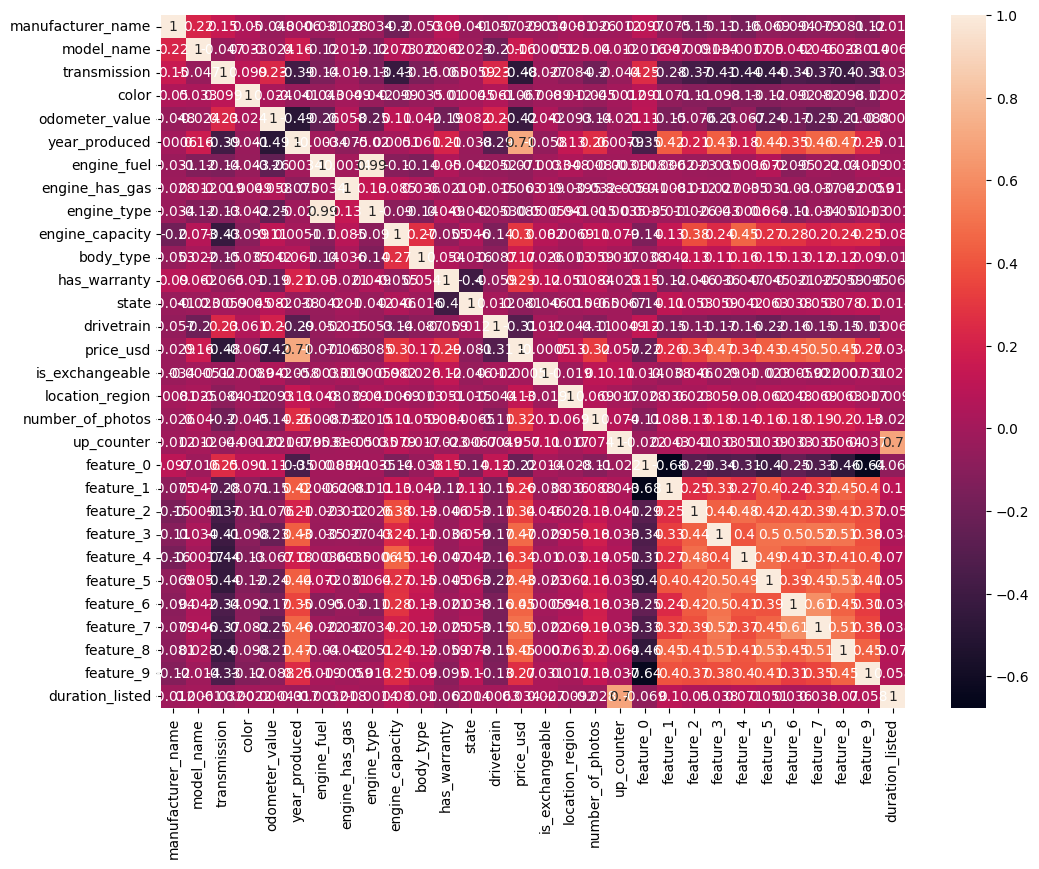

In [8]:
# Correlación entre características y precio del automóvil
corr_matrix = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [12]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Feature Selection
# Seleccionar las características con una correlación significativa con el precio del automóvil
# Ajusta el valor de 0.5 según tus criterios de selección de características
target = 'price_usd'  # Cambia 'price_usd' al nombre real de la columna de precios en tu conjunto de datos
selected_features = correlation_matrix[target][correlation_matrix[target].abs() > 0.5].index
selected_features = selected_features.drop(target)  # Eliminar la variable objetivo de las características seleccionadas
print(selected_features)


Index(['year_produced'], dtype='object')


In [13]:
# Model Development
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[selected_features], data[target], test_size=0.2, random_state=42)

# Crear y entrenar un modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = lr.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 20549143.712352008
Mean Absolute Error: 2932.9486738564688
R-squared: 0.49750981518937276


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar un modelo de regresión de bosque aleatorio
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf.predict(X_test)

# Calcular métricas de evaluación
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest Mean Absolute Error:", mae_rf)
print("Random Forest R-squared:", r2_rf)


Random Forest Mean Squared Error: 16436751.39585643
Random Forest Mean Absolute Error: 2481.0325414970184
Random Forest R-squared: 0.5980705394733505


In [15]:
# Definir los hiperparámetros que deseamos ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar GridSearchCV con el modelo de Random Forest y los hiperparámetros
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Ajustar GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados por GridSearchCV
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar y predecir con el modelo optimizado
optimized_rf = RandomForestRegressor(**best_params, random_state=42)
optimized_rf.fit(X_train, y_train)
y_pred_optimized = optimized_rf.predict(X_test)

# Calcular métricas de evaluación
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("Optimized Random Forest Mean Squared Error:", mse_optimized)
print("Optimized Random Forest Mean Absolute Error:", mae_optimized)
# print("Optimized Random Forest R-squared:", r2_optimized)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Optimized Random Forest Mean Squared Error: 16423887.514684593
Optimized Random Forest Mean Absolute Error: 2480.3640672210563


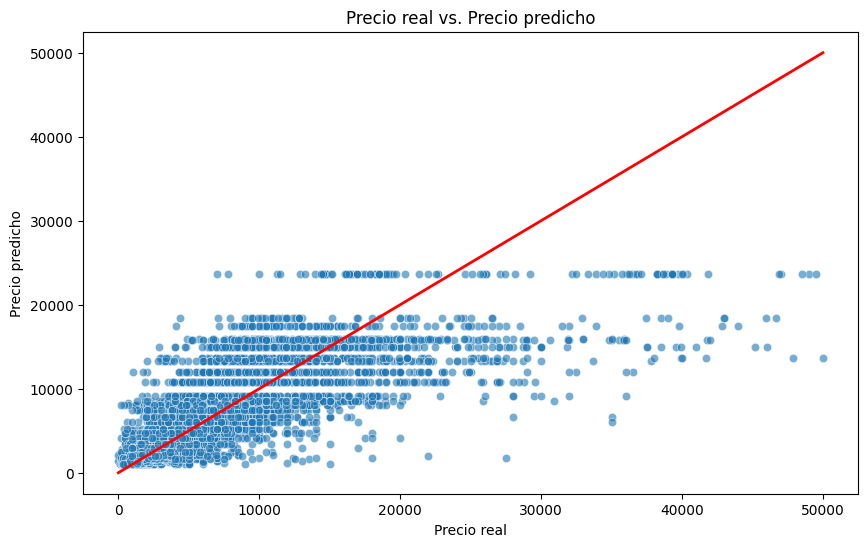

In [16]:
# Crear un DataFrame con las predicciones y los valores reales
predictions_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_optimized})
predictions_vs_actual.reset_index(drop=True, inplace=True)

# Crear un gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=predictions_vs_actual, x='Actual', y='Predicted', alpha=0.6)
plt.title('Precio real vs. Precio predicho')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')

# Dibujar una línea de referencia para mostrar la relación ideal entre los precios reales y los precios predichos
plt.plot([predictions_vs_actual.min().min(), predictions_vs_actual.max().max()],
         [predictions_vs_actual.min().min(), predictions_vs_actual.max().max()],
         color='red', lw=2)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=573616d3-c05a-47b9-b0bd-59b96c7d2e33' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>